In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import pywt
%matplotlib inline

In [2]:
img = cv2.imread("./TestImages/testmessi.jpeg")
img.shape

(275, 183, 3)

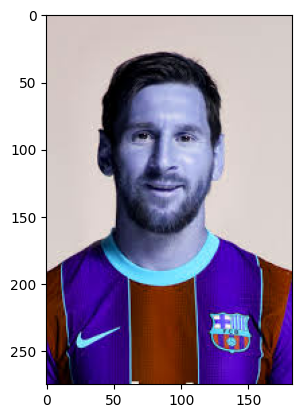

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(275, 183)

In [5]:
gray

array([[197, 197, 197, ..., 203, 203, 203],
       [197, 197, 197, ..., 203, 203, 203],
       [197, 197, 197, ..., 203, 203, 203],
       ...,
       [ 58,  53,  47, ...,  65,  65,  63],
       [ 58,  53,  47, ...,  65,  65,  63],
       [ 58,  53,  47, ...,  65,  65,  63]], shape=(275, 183), dtype=uint8)

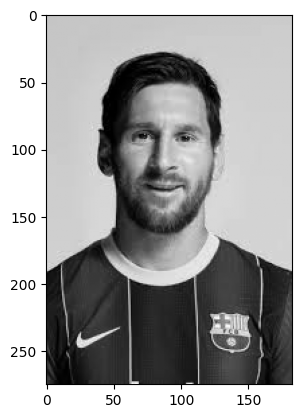

In [6]:
plt.imshow(gray, cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[42, 54, 92, 92]], dtype=int32)

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(np.int32(42), np.int32(54), np.int32(92), np.int32(92))

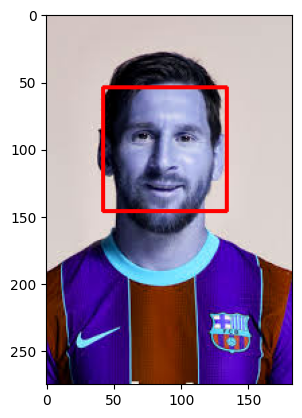

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

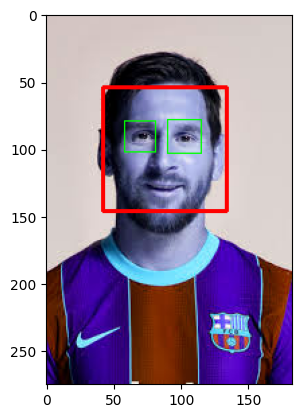

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),1)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(face_img,scaleFactor=1.1)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(face_img,(ex,ey),(ex+ew,ey+eh),(0,255,0),1)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

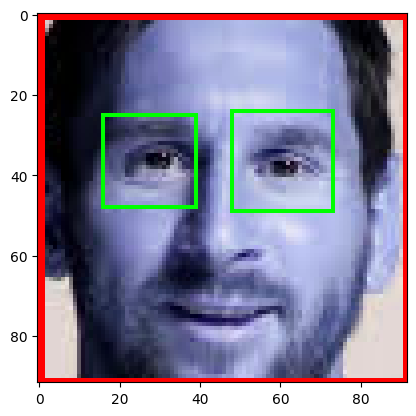

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [12]:
cropped_img = np.array(roi_color)
cropped_img.shape

(92, 92, 3)

In [13]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

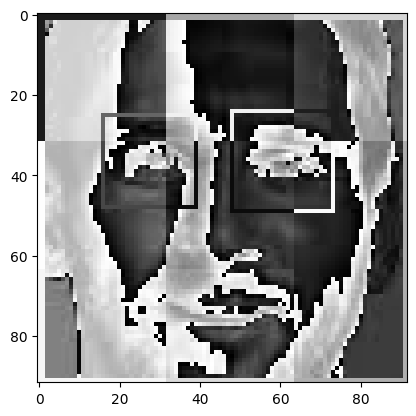

In [14]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [15]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(gray)
        if len(eyes) >= 2:
            return roi_color
        else:
            print('Both eyes not detected correctly')

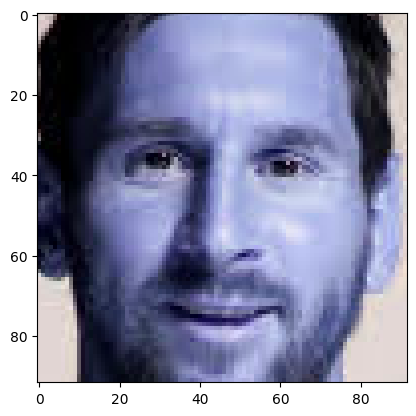

In [16]:
original_img = cv2.imread("./TestImages/testmessi.jpeg")
cropped_image = get_cropped_image_if_2_eyes('./TestImages/testmessi.jpeg')
plt.imshow(cropped_image)

In [17]:
path_to_data = "./data/"
path_to_cr_data = "./data/cropped/"

In [18]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [19]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [20]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

Cristiano Ronaldo
Generating cropped images in folder:  ./data/cropped/Cristiano Ronaldo
Both eyes not detected correctly
Both eyes not detected correctly
Both eyes not detected correctly
Both eyes not detected correctly
Both eyes not detected correctly
Both eyes not detected correctly
Both eyes not detected correctly
Both eyes not detected correctly
Both eyes not detected correctly
Both eyes not detected correctly
Both eyes not detected correctly
Both eyes not detected correctly
Both eyes not detected correctly
Both eyes not detected correctly
Both eyes not detected correctly
Both eyes not detected correctly
Both eyes not detected correctly
Both eyes not detected correctly
Both eyes not detected correctly
Erling Haaland
Generating cropped images in folder:  ./data/cropped/Erling Haaland
Both eyes not detected correctly
Both eyes not detected correctly
Both eyes not detected correctly
Both eyes not detected correctly
Both eyes not detected correctly
Both eyes not detected correctly
Bot

In [21]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Cristiano Ronaldo': ['./data/cropped/Cristiano Ronaldo\\Cristiano Ronaldo1.png',
  './data/cropped/Cristiano Ronaldo\\Cristiano Ronaldo10.png',
  './data/cropped/Cristiano Ronaldo\\Cristiano Ronaldo11.png',
  './data/cropped/Cristiano Ronaldo\\Cristiano Ronaldo12.png',
  './data/cropped/Cristiano Ronaldo\\Cristiano Ronaldo13.png',
  './data/cropped/Cristiano Ronaldo\\Cristiano Ronaldo14.png',
  './data/cropped/Cristiano Ronaldo\\Cristiano Ronaldo15.png',
  './data/cropped/Cristiano Ronaldo\\Cristiano Ronaldo16.png',
  './data/cropped/Cristiano Ronaldo\\Cristiano Ronaldo17.png',
  './data/cropped/Cristiano Ronaldo\\Cristiano Ronaldo18.png',
  './data/cropped/Cristiano Ronaldo\\Cristiano Ronaldo19.png',
  './data/cropped/Cristiano Ronaldo\\Cristiano Ronaldo2.png',
  './data/cropped/Cristiano Ronaldo\\Cristiano Ronaldo20.png',
  './data/cropped/Cristiano Ronaldo\\Cristiano Ronaldo21.png',
  './data/cropped/Cristiano Ronaldo\\Cristiano Ronaldo22.png',
  './data/cropped/Cristiano Ronaldo\

In [22]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Cristiano Ronaldo': 0,
 'Erling Haaland': 1,
 'Kylian Mbappe': 2,
 'Leonel Messi': 3}

In [23]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [24]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(116, 4096)

In [25]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8275862068965517

In [27]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        10
           1       1.00      1.00      1.00         2
           2       1.00      0.73      0.84        11
           3       1.00      0.67      0.80         6

    accuracy                           0.83        29
   macro avg       0.92      0.85      0.86        29
weighted avg       0.89      0.83      0.83        29



In [28]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [29]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [30]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

c:\Users\juan esteban\Documents\GitHub\mi_entorno\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\juan esteban\Documents\GitHub\mi_entorno\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\juan esteban\Documents\GitHub\mi_entorno\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\juan esteban\Documents\GitHub\mi_entorno\Lib\site-pa

,model,best_score,best_params
0,svm,0.828758,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.543137,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.840523,{'logisticregression__C': 1}


In [31]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, multi_class='auto',
                                     solver='liblinear'))])}

In [32]:
best_estimators['svm'].score(X_test,y_test)

0.9310344827586207

In [33]:
best_estimators['random_forest'].score(X_test,y_test)

0.6551724137931034

In [34]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.9655172413793104

In [35]:
best_clf = best_estimators['logistic_regression']

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[10,  0,  0,  0],
       [ 0,  2,  0,  0],
       [ 1,  0, 10,  0],
       [ 0,  0,  0,  6]])

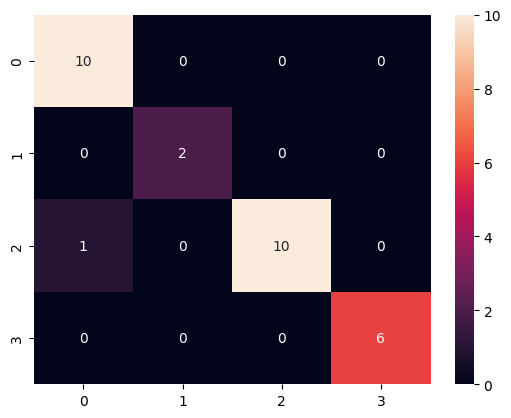

In [37]:
import seaborn as sns
sns.heatmap(cm, annot=True)
plt.show()

In [38]:
class_dict

{'Cristiano Ronaldo': 0,
 'Erling Haaland': 1,
 'Kylian Mbappe': 2,
 'Leonel Messi': 3}

In [39]:
import joblib

In [40]:
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [41]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

In [42]:
def process_image_cv2(image_path):

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    img = cv2.resize(img, (64, 64))  
    
    features = img.flatten().reshape(1, -1)
    
    return features



In [43]:
inv_class_dict = {v: k for k, v in class_dict.items()}

In [44]:
def pred(image_path):
    prep_image = process_image_cv2(image_path)

    if prep_image is None:
        return "unknown"

    pred_numero = int(best_clf.predict(prep_image)[0]) 
    player_name = inv_class_dict.get(pred_numero, "unknown")

    print(f"player name: {player_name}")
    return player_name


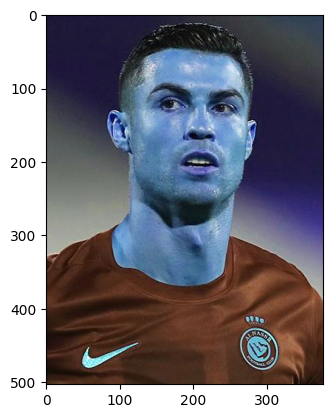

In [45]:
image_ev2 = cv2.imread("./TestImages/Cristiano_Ronaldo_ev.jpg")
plt.imshow(image_ev2)

In [46]:
pred("./TestImages/Cristiano_Ronaldo_ev.jpg")

player name: Cristiano Ronaldo


'Cristiano Ronaldo'

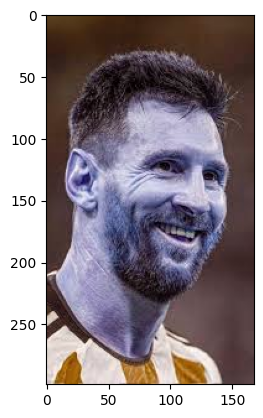

In [47]:
image_ev3= cv2.imread("./data/Leonel Messi/descarga (2).jpeg")
plt.imshow(image_ev3)

In [48]:
pred("./data/Leonel Messi/descarga (2).jpeg")

player name: Leonel Messi


'Leonel Messi'

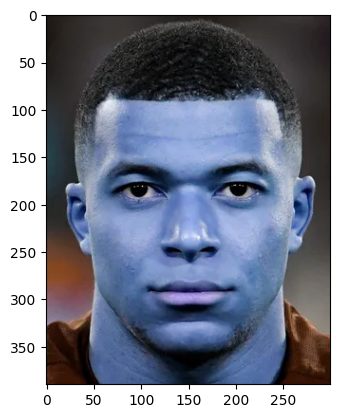

In [49]:
image_ev4= cv2.imread("./TestImages/mbappe_ev.jpeg")
plt.imshow(image_ev4)

In [50]:
pred("./TestImages/mbappe_ev.jpeg")

player name: Kylian Mbappe


'Kylian Mbappe'

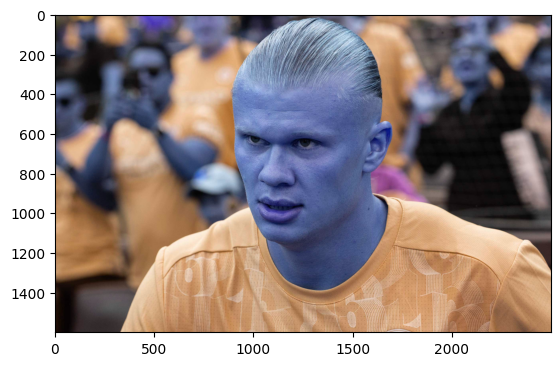

In [51]:
image_ev5= cv2.imread("./TestImages/haaland_ev.jpg")
plt.imshow(image_ev5)

In [52]:
pred("./TestImages/haaland_ev.jpg")

player name: Erling Haaland


'Erling Haaland'